# Tabla de pruebas

$$ -\Delta(x,y) = R_{1}\left(1 - \frac{|\xi_{+}|^{2}}{R_{1}^{2}} \right)^{1/2} - R_{2}\left(1 - \frac{|\xi_{+}|^{2}}{R_{2}^{2}} \right)^{1/2} + R_{2}\left(1 - \frac{|\xi_{-}|^{2}}{R_{2}^{2}} \right)^{1/2} - R_{1}\left(1 - \frac{|\xi_{-}|^{2}}{R_{1}^{2}} \right)^{1/2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget

In [2]:
def position_points(array):
    fig, ax = plt.subplots()
    ax.scatter(array[:,:-1], array[:,1:], alpha=.7, color='black', s = 80)
    ax.axis('equal')
    plt.show()

In [3]:
def matrix_points(p):
    #x son los puntos sobre el eje x
    x = list(np.array(p)[:,0])
    y = list(np.array(p)[:,1])
    
    #subm_1 es la submatriz compuesta de vectores fila de x
    subm_1x = np.array(x*len(x)).reshape(len(x),len(x))
    subm_1y = np.array(y*len(y)).reshape(len(y),len(y))
    
    #subm_2 es la submatriz compuesta de vectores columna repitiendo x
    subm_2x = np.transpose(subm_1x)
    subm_2y = np.transpose(subm_1y)
    
    #xi_a es el promedio de cada punto en x con cada uno de los demas puntos
    xi_a = (subm_1x+subm_2x)/2
    eta_a = (subm_1y+subm_2y)/2
    
    #xi_d es la distancia de cada punto con cada uno de los demas puntos
    xi_d = subm_2x-subm_1x
    eta_d = subm_2y-subm_1y
    
    #vectores de las matrices xi_a y xi_d
    xi_av = list(xi_a.reshape(1,len(xi_a)**2))
    xi_dv = list(xi_d.reshape(1,len(xi_d)**2))
    eta_av = list(eta_a.reshape(1,len(eta_a)**2))
    eta_dv = list(eta_d.reshape(1,len(eta_d)**2))
    
    #matriz con todas las parejas de puntos xi_a y xi_d
    xi_m = np.transpose(np.array(xi_av+xi_dv+eta_av+eta_dv)).reshape(len(x),len(x),4)
    return xi_m

In [4]:
def GeometricPotencial_3D_00_reducido(xa, xi_a, xi_d, ya, eta_a, eta_d, za, wa, c, R1, R2):
    #constantes
    pic = 1 / ((4*np.pi) ** 2)
    k = ((2*np.pi)/wa)
    
    xi_p, xi_n = xi_a+(xi_d)/2, xi_a-(xi_d)/2
    eta_p, eta_n = eta_a+(eta_d)/2, eta_a-(eta_d)/2
    
    #R1 = R1*w
    #R2 = R2*w
    normPlus  = (xi_p**2) + (eta_p**2)
    normMinus = (xi_n**2) + (eta_n**2)
    phase_plus  = R1 * np.sqrt(1 - (normPlus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normPlus / (R2 ** 2)) + 0j)
    phase_minus = R1 * np.sqrt(1 - (normMinus / (R1 ** 2)) + 0j) - R2 * np.sqrt(1 - (normMinus / (R2 ** 2)) + 0j)
    phase = np.exp(-1j*k*phase_plus*c) * np.exp(1j*k*phase_minus*c)
    
    #distancia s
    s_1 = np.sqrt(((xa-xi_p) ** 2) + ((ya-eta_p) **2) + ((za) ** 2))
    s_2 = np.sqrt(((xa-xi_n) **2) + ((ya-eta_n) ** 2) + ((za) ** 2))
    
    #kernel
    kernel_0 = 2*((k**2)*pic) * ((za+s_1)/(s_1 ** 2)) * ((za+s_2)/(s_2 ** 2)) * np.exp(1j*k*s_1-1j*k*s_2) * phase 
    kernel = np.real(kernel_0)
    #print(phase)
    return kernel

def GeometricPotencial_3D_Real(xa, ya, za, p, wa,c,R1,R2):
    sum_r = 0
    matrix_complete = matrix_points(p)
    matrix_real = np.einsum('iij->ij', matrix_complete)
    for i in matrix_real:
        sum_r = sum_r + GeometricPotencial_3D_00_reducido(xa,i[0],i[1],ya,i[2],i[3],za,wa,c,R1,R2)
    return sum_r

def GeometricPotencial_3D_Virtual(xa, ya, za, p, wa,c,R1,R2):
    sum_v = 0
    matrix_complete = matrix_points(p)
    matrix_virtual = []
    
    for i in range(0,len(matrix_complete)):
        for j in range(0,len(matrix_complete)):
            if i != j:
                matrix_virtual.append(list(matrix_complete[i,j]))
    
    matrix_virtual = np.array(matrix_virtual)
    
    for k in matrix_virtual:
        sum_v = sum_v + GeometricPotencial_3D_00_reducido(xa,k[0],k[1],ya,k[2],k[3],za,wa,c,R1,R2)
    return sum_v

def GeometricPotencial_3D_reducido(xa, ya, za, p, wa,c,R1,R2):
    sum_t = 1*GeometricPotencial_3D_Real(xa, ya, za, p, wa,c,R1,R2) + 1*GeometricPotencial_3D_Virtual(xa, ya, za, p, wa,c,R1,R2)
    return sum_t

## R1, R2 = 5$\lambda$,  -5$\lambda$

| # de puntos  | Distancia entre puntos| $R_{1}$ | $R_{2}$   |$\lambda$|
|:------------:|:---------------------:|:-------:|:---------:|:-------:|
|:------------:|:---------------------:|:-------:|:---------:|:-------:|
| 36           | 0.25                  | 5       | -5        |400      |
| 36           | 0.50                  | 5       | -5        |400      |
| 36           | 0.75                  | 5       | -5        |400      |
| 36           | 1.00                  | 5       | -5        |400      |
| 36           | 1.25                  | 5       | -5        |400      |
| 36           | 1.41                  | 5       | -5        |400      |

posición aproximada del foco:  1.0000000000000002e-06 ||| a maximo:  1.4142135623730951


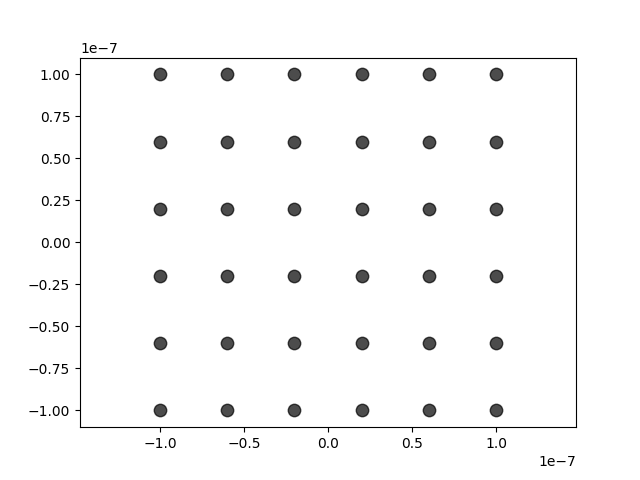

In [22]:
w      = 400 * (10 ** -9)
r1     = 5*w
r2     = -5*w
a      = .1 * w
points = np.array([[-1/2,-1/2],[-1/2,1/2],[1/2,1/2],[1/2,-1/2],[1/2,(3/2)],[1/2,-(3/2)],[-1/2,(3/2)],[-1/2,-(3/2)],[(3/2),1/2],[(3/2),-1/2],[(3/2),(3/2)],[(3/2),-(3/2)],[-(3/2),1/2],[-(3/2),-1/2],[-(3/2),(3/2)],[-(3/2),-(3/2)],[(5/2),(3/2)],[(5/2),-(3/2)],[(5/2),1/2],[(5/2),-1/2],[-(5/2),(3/2)],[-(5/2),-(3/2)],[-(5/2),1/2],[-(5/2),-1/2],[5/2,5/2],[-5/2,5/2],[-3/2,5/2],[-1/2,5/2],[3/2,5/2],[1/2,5/2],[5/2,-5/2],[-5/2,-5/2],[-3/2,-5/2],[-1/2,-5/2],[3/2,-5/2],[1/2,-5/2]])*a
paraxial_aprox = (((1/r1) - (1/r2))) ** -1
print('posición aproximada del foco: ', paraxial_aprox, '||| a maximo: ',np.sqrt(2))

position_points(points)